1. Load the Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import time
import matplotlib.pyplot as plt

In [6]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')


In [7]:

# Perform EDA: Data types, summary statistics, missing values
print("Data Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  1

In [8]:
# Check for missing values
missing_values_count = (df.isnull().sum() / len(df)) * 100
print("\nMissing values percentage for each column:")
print(missing_values_count)



Missing values percentage for each column:
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


2. Handle Missing Data


In [9]:
# Check for missing values
missing_values_count = (df.isnull().sum() / len(df)) * 100
print("Missing values count for each column:")
print(missing_values_count)

# Since no missing values are found in this dataset, no further handling is required


Missing values count for each column:
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64


3. Feature Engineering

In [10]:
# Separate the feature matrix (X) and target variable (y)
X = df.drop(columns=["Outcome"]).values  # Features
y = df["Outcome"].values  # Target


In [11]:
# Implement a custom train-test split function
import numpy as np

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test


In [12]:
# Perform a train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


4. Implement KNN

Euclidean Distance Function

In [13]:
def euclidean_distance(point1, point2): #The euclidean_distance function computes the Euclidean distance between two points.
    """
    Calculate the Euclidean distance between two points.
    """
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions.")
    return np.sqrt(np.sum((point1 - point2) ** 2))


KNN Prediction for a Single Query

In [14]:
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using KNN.
    """
    distances = [euclidean_distance(query, train_point) for train_point in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()  # Majority voting
    return prediction


KNN Prediction for All Test Samples

In [15]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using KNN.
    """
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


Evaluating Accuracy

In [16]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

# Perform predictions on the test set
predictions = knn_predict(X_test, X_train, y_train, k=3)

# Calculate accuracy
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")


Accuracy of the KNN model on the test set: 67.39%


Problem 2: Experimentation
1. Repeat the Classification Task:

Scale the feature matrix
𝑋
X.
Use the scaled data for training and testing the KNN classifier.
Record the results.
Step 1: Scaling the Feature Matrix

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the features using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and test KNN on scaled data
k = 3  # You can experiment with different k values later
predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k)
accuracy_scaled = accuracy_score(y_test, predictions_scaled)

print(f"Accuracy on scaled data: {accuracy_scaled * 100:.2f}%")


Accuracy on scaled data: 70.87%


Step 2: Compare the Results

In [18]:
# Train and test KNN on original (non-scaled) data
predictions_original = knn_predict(X_test, X_train, y_train, k)
accuracy_original = accuracy_score(y_test, predictions_original)

print(f"Accuracy on original data: {accuracy_original * 100:.2f}%")


Accuracy on original data: 67.39%


Problem 3: Experimentation with k

Step 1: Run the KNN Model for Different k Values

In [24]:

# Function to run KNN for a range of k values
def knn_experiment(X_train, X_test, y_train, y_test, k_values):
    accuracies = []
    times = []

    for k in k_values:
        start_time = time.time()  # Start the timer

        # Make predictions using the KNN model
        predictions = knn_predict(X_test, X_train, y_train, k)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)

        # Measure time taken
        end_time = time.time()
        time_taken = end_time - start_time
        times.append(time_taken)

    return accuracies, times

# Define the range of k values to test
k_values = range(1, 16)

# Experiment on original data
accuracies_original, times_original = knn_experiment(X_train, X_test, y_train, y_test, k_values)

# Experiment on scaled data
accuracies_scaled, times_scaled = knn_experiment(X_train_scaled, X_test_scaled, y_train, y_test, k_values)

print("Experiment Results:")
print(accuracies_original)
print(times_original)

Experiment Results:
[0.6869565217391305, 0.7260869565217392, 0.6739130434782609, 0.7217391304347827, 0.6869565217391305, 0.7, 0.691304347826087, 0.7130434782608696, 0.7, 0.717391304347826, 0.7304347826086957, 0.7391304347826086, 0.7434782608695653, 0.7260869565217392, 0.7391304347826086]
[1.04172682762146, 1.4979021549224854, 1.509352445602417, 1.5242838859558105, 0.8574414253234863, 0.8224468231201172, 0.8260698318481445, 0.8257763385772705, 0.8716895580291748, 0.8293790817260742, 0.8597750663757324, 0.8334038257598877, 0.8322031497955322, 0.8731954097747803, 0.8377561569213867]


2. Visualize the Results:

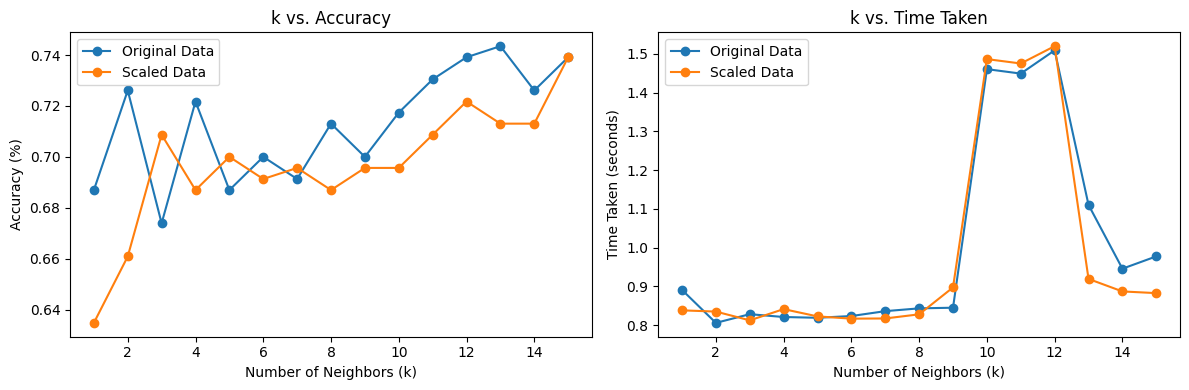

In [21]:
# Plotting k vs Accuracy
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies_original, label="Original Data", marker='o')
plt.plot(k_values, accuracies_scaled, label="Scaled Data", marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (%)')
plt.title('k vs. Accuracy')
plt.legend()

# Time plot
plt.subplot(1, 2, 2)
plt.plot(k_values, times_original, label="Original Data", marker='o')
plt.plot(k_values, times_scaled, label="Scaled Data", marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs. Time Taken')
plt.legend()

plt.tight_layout()
plt.show()


Accuracy vs. 𝑘 k:

Small 𝑘 k: High sensitivity to noise, risk of overfitting. Large 𝑘 k: Smoother predictions but risk of underfitting. Scaling improves accuracy consistency as features contribute equally. Computational Cost vs. 𝑘 k:

Cost grows with 𝑘 k since more distances are computed and sorted. Trade-off exists between high accuracy and time efficiency. Optimal 𝑘 k:

Found where accuracy peaks or stabilizes with moderate computational cost (often 𝑘 = 3 k=3 to 𝑘 = 10 k=10). Use cross-validation to confirm the choice of 𝑘 k. Let me know your results, and I can help pinpoint the best 𝑘 k